In [3]:
import string
from collections import Counter

import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [4]:
import pandas as pd
import nltk
data=pd.read_csv("submission.csv")
print(data)

          textID                                      selected_text
0     f87dea47db  Last session of the day  http://twitpic.com/67ezh
1     96d74cb729                                           exciting
2     eee518ae67                                          Recession
3     01082688c6                                        happy bday!
4     33987a8ee5                                        I like it!!
...          ...                                                ...
3529  e5f0e6ef4b                                              tired
3530  416863ce47                                             Thanks
3531  6332da480c   I know what you mean. My little dog is sinkin...
3532  df1baec676                                I love your videos!
3533  469e15c5a8                                               cute

[3534 rows x 2 columns]


In [46]:
data.head()

,textID,selected_text
0,f87dea47db,Last session of the day http://twitpic.com/67ezh
1,96d74cb729,exciting
2,eee518ae67,Recession
3,01082688c6,happy bday!
4,33987a8ee5,I like it!!


In [5]:
data = data.drop(columns=['textID'])
print(data)

                                          selected_text
0     Last session of the day  http://twitpic.com/67ezh
1                                              exciting
2                                             Recession
3                                           happy bday!
4                                           I like it!!
...                                                 ...
3529                                              tired
3530                                             Thanks
3531   I know what you mean. My little dog is sinkin...
3532                                I love your videos!
3533                                               cute

[3534 rows x 1 columns]


In [48]:
data = data.applymap(lambda x: x.lower() if isinstance(x, str) else x)
print(data)

                                          selected_text
0     last session of the day  http://twitpic.com/67ezh
1                                              exciting
2                                             recession
3                                           happy bday!
4                                           i like it!!
...                                                 ...
3529                                              tired
3530                                             thanks
3531   i know what you mean. my little dog is sinkin...
3532                                i love your videos!
3533                                               cute

[3534 rows x 1 columns]


In [6]:
import string

data = data.applymap(lambda x: x.translate(str.maketrans('', '', string.punctuation)) if isinstance(x, str) else x)
print(data)

                                          selected_text
0          Last session of the day  httptwitpiccom67ezh
1                                              exciting
2                                             Recession
3                                            happy bday
4                                             I like it
...                                                 ...
3529                                              tired
3530                                             Thanks
3531   I know what you mean My little dog is sinking...
3532                                 I love your videos
3533                                               cute

[3534 rows x 1 columns]


In [7]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
data['selected_text'] = data['selected_text'].astype(str)
#ensure in string or not

In [15]:
data['tokenized_text'] = data['selected_text'].apply(lambda x: word_tokenize(x, language='english'))

print(data)

                                          selected_text  \
0          last session of the day  httptwitpiccom67ezh   
1                                              exciting   
2                                             recession   
3                                            happy bday   
4                                             i like it   
...                                                 ...   
3529                                              tired   
3530                                             thanks   
3531   i know what you mean my little dog is sinking...   
3532                                 i love your videos   
3533                                               cute   

                                         tokenized_text  
0     [last, session, of, the, day, httptwitpiccom67...  
1                                            [exciting]  
2                                           [recession]  
3                                         [happy, bday]  
4

In [16]:
stop_words = set(stopwords.words('english'))
def remove_stopwords(tokenized_text):
    return [word for word in tokenized_text if word.lower() not in stop_words]
data['cleaned_text'] = data['tokenized_text'].apply(remove_stopwords)

print(data)

                                          selected_text  \
0          last session of the day  httptwitpiccom67ezh   
1                                              exciting   
2                                             recession   
3                                            happy bday   
4                                             i like it   
...                                                 ...   
3529                                              tired   
3530                                             thanks   
3531   i know what you mean my little dog is sinking...   
3532                                 i love your videos   
3533                                               cute   

                                         tokenized_text  \
0     [last, session, of, the, day, httptwitpiccom67...   
1                                            [exciting]   
2                                           [recession]   
3                                         [happy, bday]

In [20]:
data = []  

with open('emotions.txt', 'r') as file:
    for line in file:
        clear_line = line.strip() 
        if clear_line:  
            word, emotion = clear_line.split(':')  
            data.append(emotion)  
print(data)


[" 'cheated',", " 'cheated',", " 'singled out',", " 'loved',", " 'loved',", " 'attracted',", " 'sad',", " 'fearful',", " 'attracted',", " 'sad',", " 'fearful',", " 'happy',", " 'angry',", " 'sad',", " 'happy',", " 'angry',", " 'attracted',", " 'bored',", " 'angry',", " 'singled out',", " 'esteemed',", " 'fearful',", " 'loved',", " 'lustful',", " 'lustful',", " 'attached',", " 'attracted',", " 'independent',", " 'fearful',", " 'embarrassed',", " 'powerless',", " 'happy',", " 'attached',", " 'sad',", " 'cheated',", " 'surprise',", " 'angry',", " 'happy',", " 'happy',", " 'powerless',", " 'sad',", " 'angry',", " 'fearless',", " 'bored',", " 'fearless',", " 'happy',", " 'happy',", " 'safe',", " 'adequate',", " 'attached',", " 'powerless',", " 'singled out',", " 'fearful',", " 'fearless',", " 'belittled',", " 'attracted',", " 'hated',", " 'cheated',", " 'happy',", " 'sad',", " 'happy',", " 'attached',", " 'fearful',", " 'independent',", " 'codependent',", " 'cheated',", " 'happy',", " 'aver

In [21]:

data = Counter(data)
print(data)


Counter({" 'sad',": 76, " 'happy',": 66, " 'fearful',": 45, " 'angry',": 35, " 'attracted',": 32, " 'powerless',": 26, " 'singled out',": 18, " 'hated',": 17, " 'fearless',": 16, " 'anxious',": 15, " 'entitled',": 14, " 'cheated',": 13, " 'attached',": 13, " 'belittled',": 11, " 'apathetic',": 11, " 'adequate',": 10, " 'alone',": 10, " 'loved',": 9, " 'esteemed',": 9, " 'lustful',": 9, " 'surprise',": 6, " 'demoralized',": 6, " 'bored',": 5, " 'independent',": 5, " 'codependent',": 5, " 'free',": 5, " 'focused',": 4, " 'derailed',": 4, " 'embarrassed',": 3, " 'safe',": 3, " 'average',": 3, " 'obsessed',": 3, " 'ecstatic',": 3, " 'lost',": 3, " 'burdened',": 3, " 'angry'": 1})


In [22]:
def sentiment_analyse(sentiment_text):
    sia = SentimentIntensityAnalyzer()
    emotions = ' '.join(sentiment_text)  # Convert list of emotions to a single string
    score = sia.polarity_scores(emotions)
    if score['neg'] > score['pos']:
        print("Negative Sentiment")
    else:
        print("Positive Sentiment")
    
sentiment_analyse(data)


Positive Sentiment


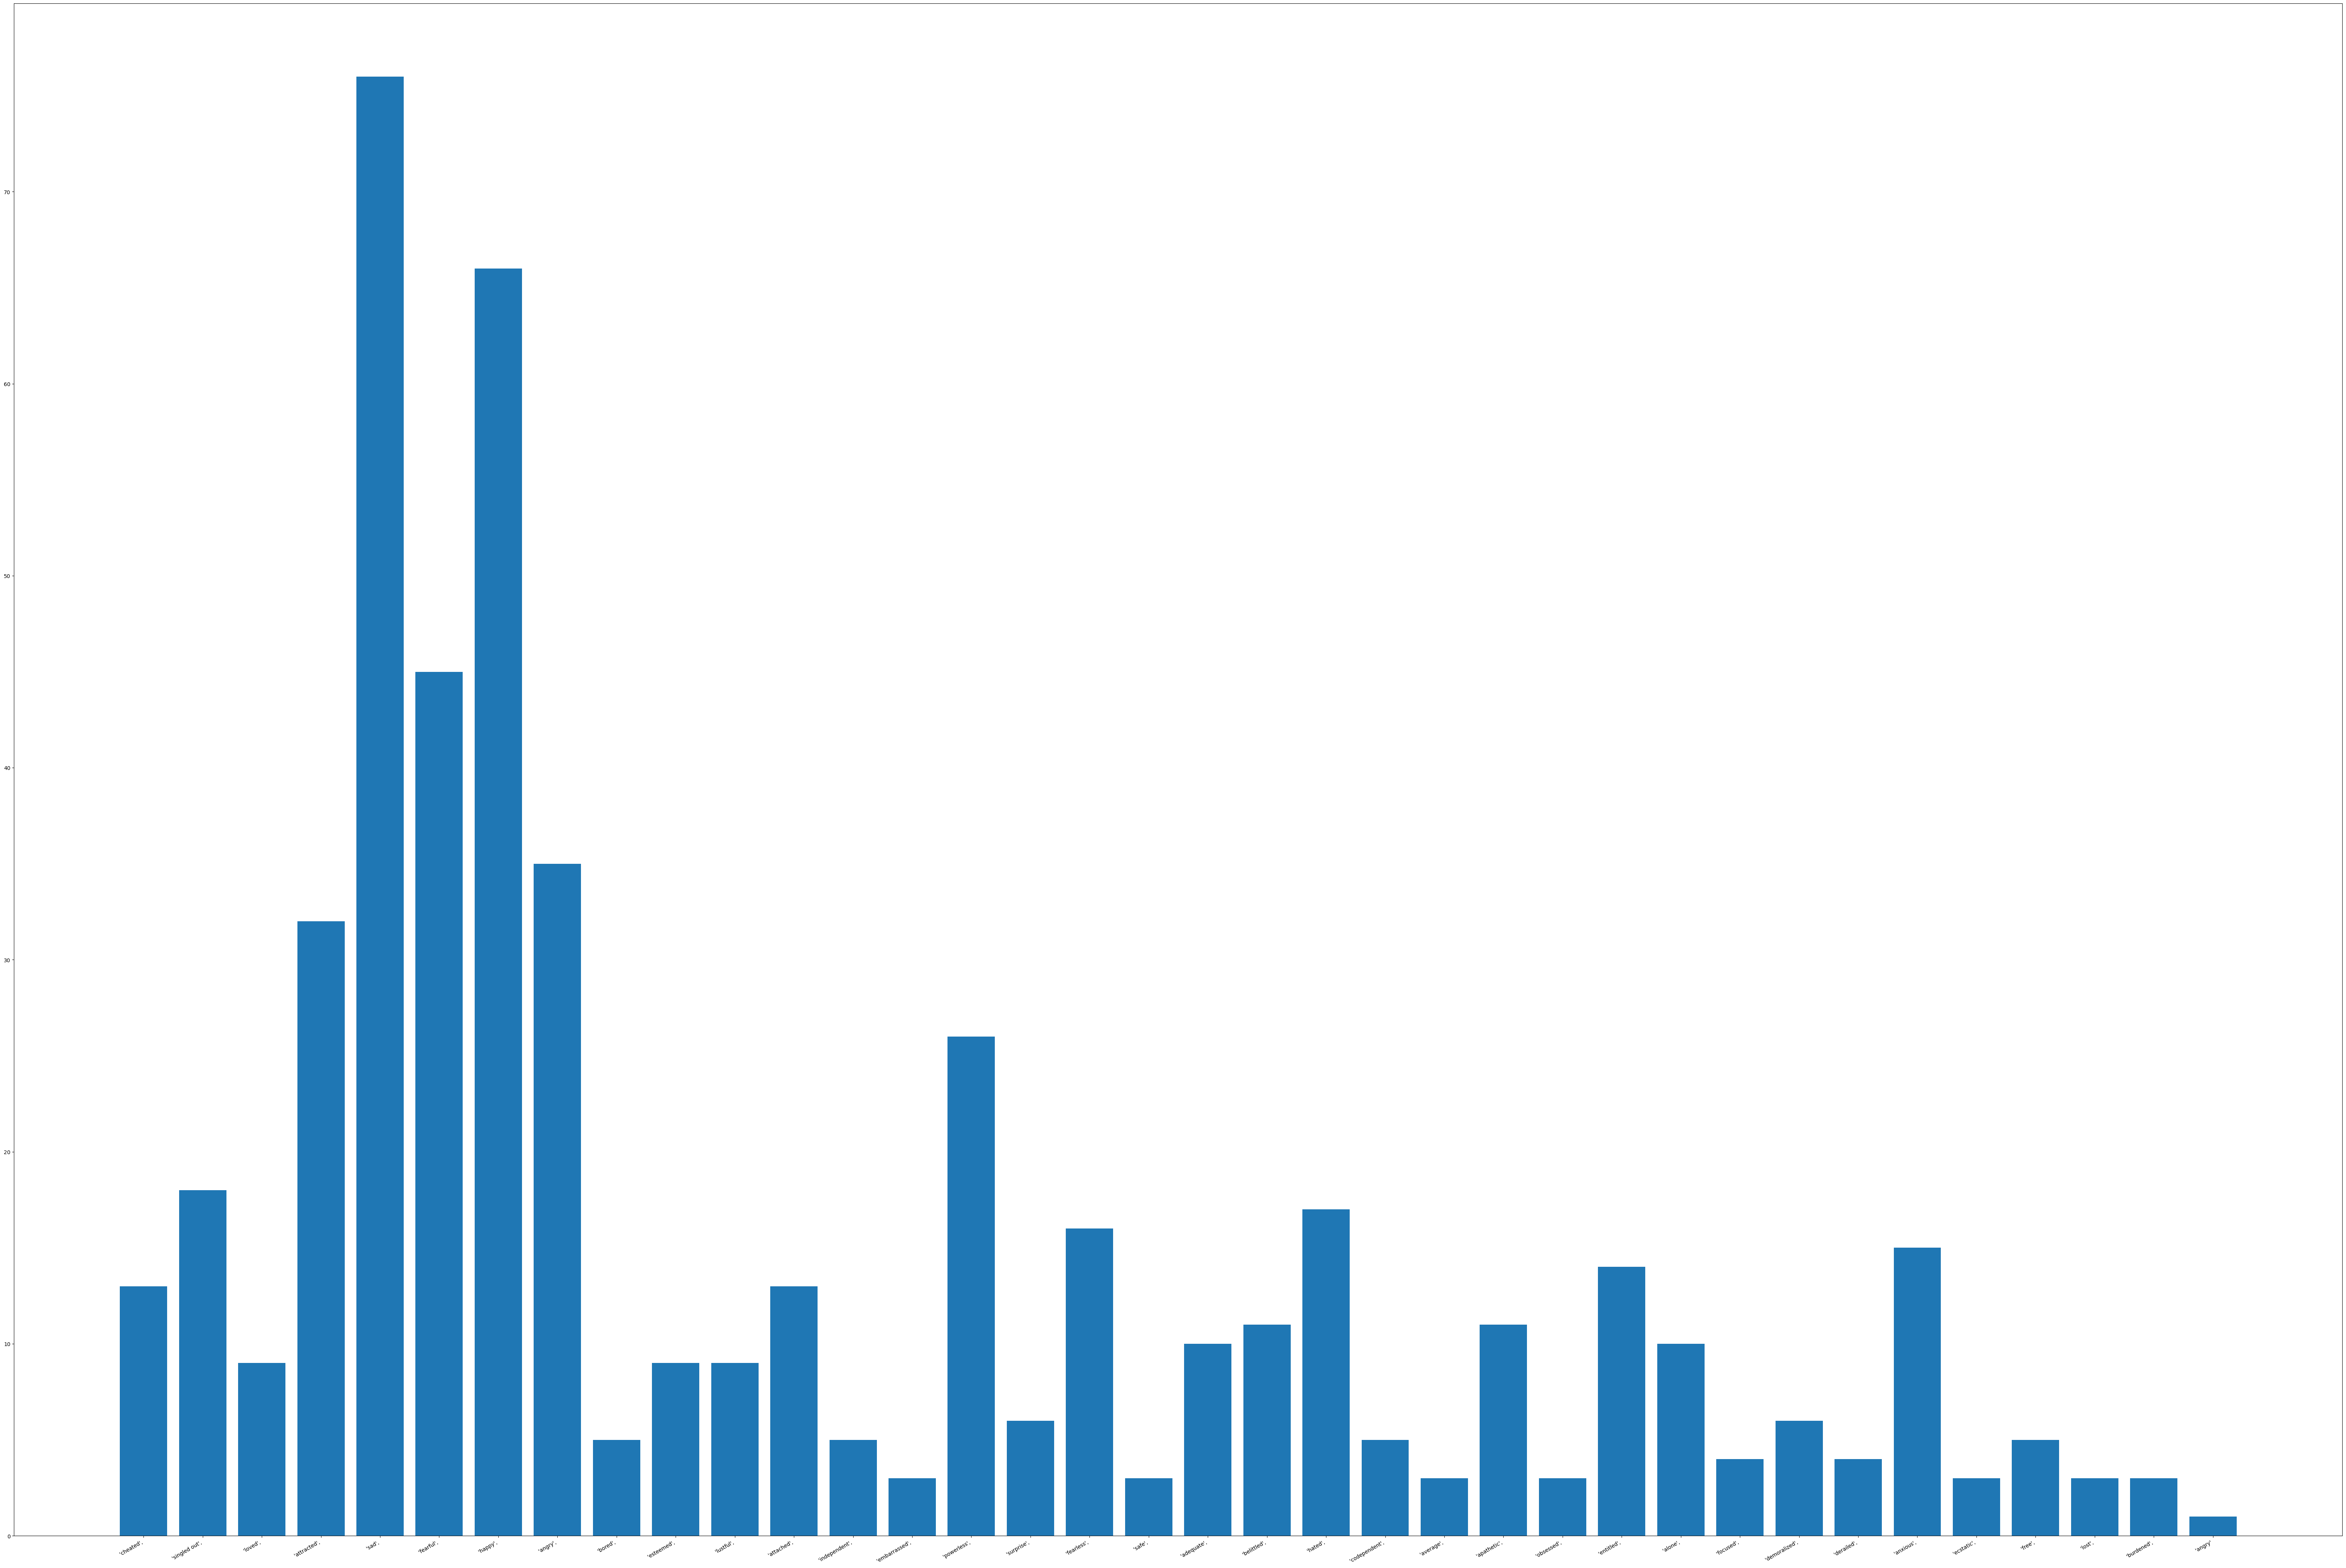

In [23]:
fig, ax1 = plt.subplots(figsize=(80, 60))
ax1.bar(data.keys(), data.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()

In [11]:
def sentiment_analyse(sentiment_text):
    score = SentimentIntensityAnalyzer().polarity_scores(sentiment_text)
    if score['neg'] > score['pos']:
        print("Negative Sentiment")
    elif score['neg'] < score['pos']:
        print("Positive Sentiment")

In [32]:
x='The food  was absolutely wonderful,from preparation to presentation, very pleasing.'
sentiment_analyse(x)

Positive Sentiment


In [33]:
sample='Food was pretty bad and the service was very slow'
sentiment_analyse(sample)

Negative Sentiment


In [34]:
u="why so dull bro"
sentiment_analyse(u)

Negative Sentiment


In [35]:
i="love u babes"
sentiment_analyse(i)

Positive Sentiment


In [14]:
i="I cried out of excitement"
sentiment_analyse(i)

Positive Sentiment
